In [1]:
import pandas as pd
import numpy as np
from scipy.stats import binom, ttest_1samp
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
n = 20
p = 0.7
alpha = 0.05

In [2]:
x_crit = binom.ppf(0.05, n, p)
print(x_crit)

11.0


In [3]:
list = {'x': list(np.arange(0.7, 0.99, 0.01))}
table = pd.DataFrame(list)
table

,x
0,0.70
1,0.71
2,0.72
3,0.73
4,0.74
5,0.75
6,0.76
7,0.77
8,0.78
9,0.79


In [4]:
result = stats.ttest_1samp(table, x_crit, axis = 0)
print("t stat:", result.statistic)
print("p-value:", result.pvalue)

t stat: [-631.8146676]
p-value: [1.42634551e-61]


In [5]:
if result.pvalue < 0.05:
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [6]:
ppf = lambda x:binom.ppf(x, n, p)

In [7]:
table['_ppf_'] = table['x'].apply(ppf)
table

,x,_ppf_
0,0.70,15.0
1,0.71,15.0
2,0.72,15.0
3,0.73,15.0
4,0.74,15.0
5,0.75,15.0
6,0.76,15.0
7,0.77,16.0
8,0.78,16.0
9,0.79,16.0


In [8]:
def power(mean, mu1, std, n, alpha):
    t_alpha_2 = stats.t(n-1).ppf(1-alpha/2)
    delta = (mu1 - mean)/(std/np.sqrt(n))
    return 1-stats.t(n-1).cdf(t_alpha_2-delta)+stats.t(n-1).cdf(-t_alpha_2-delta)

std = np.std(table['x'], ddof=1)
print(std)

0.08803408430829512


[0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
------
------
POWER CURVE


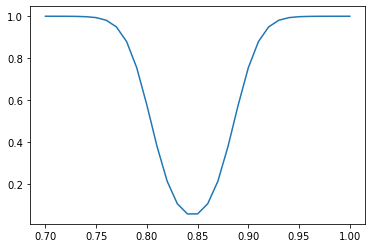

In [9]:
mu_assumed = np.arange(0.7, 1, 0.01)
mean1 = np.mean(table.x)
print(mu_assumed)
print('------')
print('------')
power_vec = np.vectorize(power)
plt.plot(mu_assumed, power_vec(mean1, mu_assumed, std, n, alpha))
print('POWER CURVE')
plt.show()